# Identificaiton of Characteristics of Legendary Type Pokemon

Legendary pokemon are extremely rare and powerful Pokémon that are often associated with legends of creation and/or destruction within their endemic regions.

Of the 821 Pokémon species, 49 are Legendary Pokémon (5.97%). Each released generation has introduced at least three Legendary Pokémon.


In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory analysis of pokemon dataset

The data used for this analyis comes from an online dataset available on [Kaggle](https://www.kaggle.com/rounakbanik/pokemon). The dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon.

#### Data dictionary

- **name:** The English name of the Pokemon
- **japanese_name:** The Original Japanese name of the Pokemon
- **pokedex_number:** The entry number of the Pokemon in the National Pokedex
- **percentage_male:** The percentage of the species that are male. Blank if the Pokemon is genderless.
- **type1:** The Primary Type of the Pokemon
- **type2:** The Secondary Type of the Pokemon
- **classification:** The Classification of the Pokemon as described by the Sun and Moon Pokedex
- **height_m:** Height of the Pokemon in metres
- **weight_kg:** The Weight of the Pokemon in kilograms
- **capture_rate:** Capture Rate of the Pokemon
- **base_egg_steps:** The number of steps required to hatch an egg of the Pokemon
- **abilities:** A stringified list of abilities that the Pokemon is capable of having
- **experience_growth:** The Experience Growth of the Pokemon
- **base_happiness:** Base Happiness of the Pokemon
- **against_?:** Eighteen features that denote the amount of damage taken against an attack of a particular type
- **hp:** The Base HP of the Pokemon
- **attack:** The Base Attack of the Pokemon
- **defense:** The Base Defense of the Pokemon
- **sp_attack:** The Base Special Attack of the Pokemon
- **sp_defense:** The Base Special Defense of the Pokemon
- **speed:** The Base Speed of the Pokemon
- **generation:** The numbered generation which the Pokemon was first introduced
- **is_legendary:** Denotes if the Pokemon is legendary.


In [21]:
pokemon = pd.read_csv('data/pokemon.csv')
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [6]:
pokemon.shape

(801, 41)

In [8]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

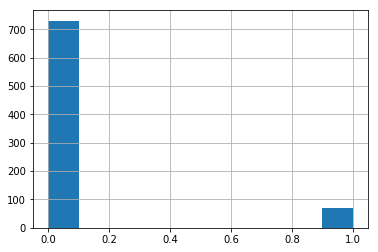

In [56]:
# Evaluation of distribution of legendary vs non-legendary Pokemon
pokemon.is_legendary.hist();

## Data preprocessing

In [36]:
import numpy as np

In [43]:
# Fill null numeric values

# Fill NaN with 50%
pokemon['percentage_male'].fillna(50.0, inplace=True)

# Fill NaN with mean
pokemon['height_m'].fillna(pokemon['height_m'].mean(), inplace=True)
pokemon['weight_kg'].fillna(pokemon['weight_kg'].mean(), inplace=True)

In [90]:
cols_numeric = pokemon.columns[(pokemon.dtypes == 'float') | (pokemon.dtypes == 'int')]
X = pokemon[cols_numeric].drop('is_legendary', axis=1)
y = pokemon['is_legendary']

## Comparison of non-legendary and legendary pokemon

In [50]:
from sklearn.decomposition import PCA
from matplotlib import cm

In [6]:
stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

legendaries = pokemon.loc[pokemon['is_legendary'] == 1, stats]
non_legendaries = pokemon.loc[pokemon['is_legendary'] == 0, stats]

Text(0.5, 1.0, 'Combat statistics for Legendary (red) vs Non-Legendary (blue) Pokemon')

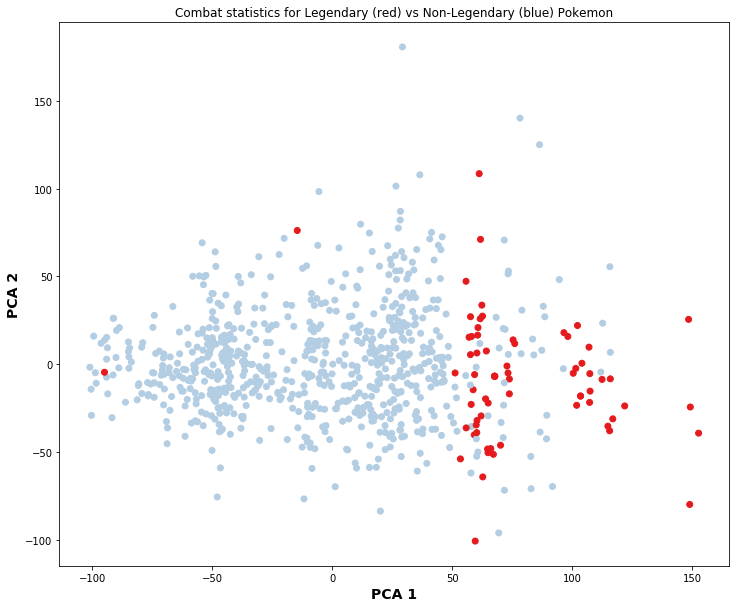

In [92]:
# Reduce combat statistics into 2D graph

X_reduced = PCA(n_components=2).fit_transform(pokemon[stats])

plt.figure(figsize=(12,10))
ax = plt.subplot()
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=pokemon['is_legendary'].apply(lambda x: cm.get_cmap('Set1')(0) if x == 1 else cm.get_cmap('Pastel1')(1)))
ax.set_xlabel('PCA 1', fontdict={'size': 14, 'fontweight': 600})
ax.set_ylabel('PCA 2', fontdict={'size': 14, 'fontweight': 600})
ax.set_title('Combat statistics for Legendary (red) vs Non-Legendary (blue) Pokemon')

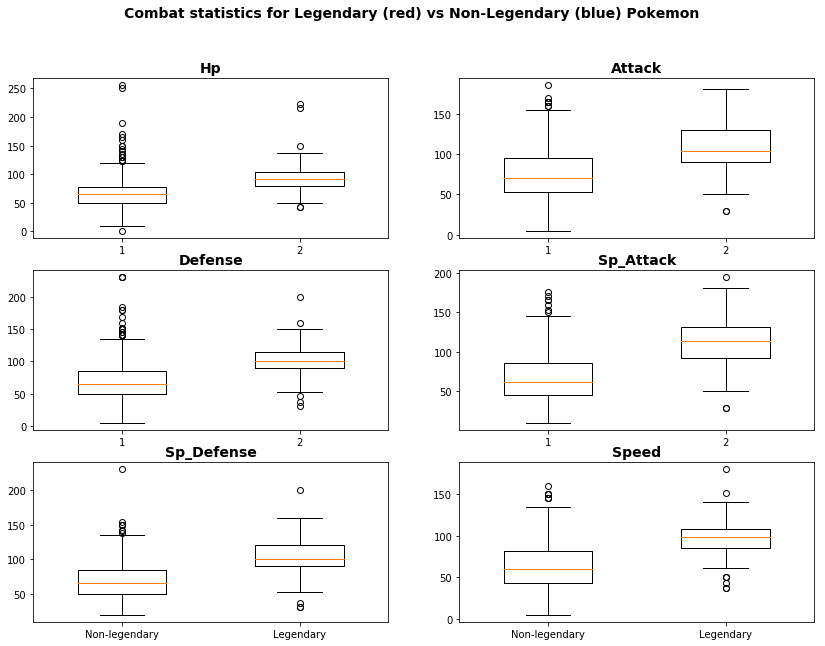

In [136]:
# Box plots of combat statistics for Legendary vs Non-Legendary pokemon

fig = plt.figure(figsize=(14,10))

for i, stat in enumerate(stats, start=1):
    ax = plt.subplot(3,2,i)
    if i >= 5:
        labels = ['Non-legendary', 'Legendary']
    else:
        labels = None
    ax.boxplot([non_legendaries[stat], legendaries[stat]], labels=labels, widths=.5,)
    ax.set_title(stat.title(), fontdict={'size': 14, 'fontweight': 600})
    
fig.suptitle('Combat statistics for Legendary (red) vs Non-Legendary (blue) Pokemon', fontsize=14, fontweight=600);

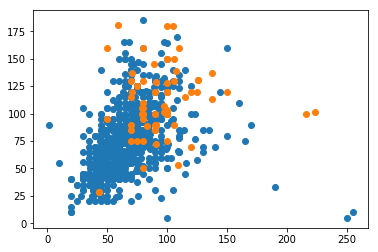

In [15]:
plt.scatter(non_legendaries['hp'], non_legendaries['attack'])
plt.scatter(legendaries['hp'], legendaries['attack'])


## Training data

In [21]:
from sklearn.model_selection import train_test_split 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [99]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((560, 33), (560,), (241, 33), (241,))

## Modeling

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [100]:
# Logistic Model
lm = LogisticRegression()
lm.fit(X_train, y_train)
cross_val_score(lm, X_test, y_test, scoring='f1')

/Users/mattheweng/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mattheweng/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mattheweng/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mattheweng/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mattheweng/anaconda/lib/python3.6/site-packages/sk

array([0.75      , 0.88888889, 0.75      ])

In [115]:
# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
cross_val_score(rf, X_test, y_test, scoring='f1')

/Users/mattheweng/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mattheweng/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.75, 0.75, 0.5 ])

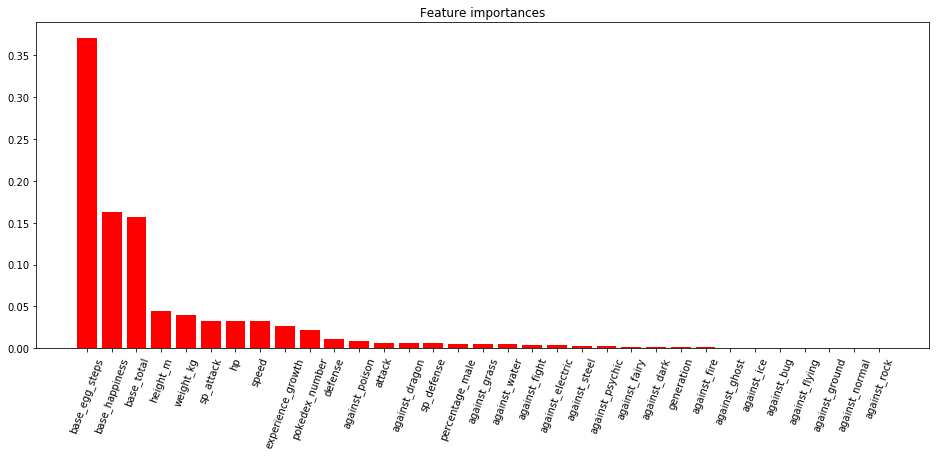

In [116]:
# View feature importances

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feats = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(16,6))
plt.title("Feature importances")
plt.bar(feats[indices], importances[indices], color="r", align="center")
plt.xticks(rotation=70);

## Model testing